# Machine Learning Final Project

In [1]:
 #conda install -c plotly plotly=5.8.0
 #or
 #pip install plotly

**importing the libraries**

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
import time
from pandas import DataFrame

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV


In [3]:
#importing our cancer dataset
dataset = pd.read_csv('BRCA.csv')
dataset.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [4]:
#Drop NA 
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float

## Data Cleaning 

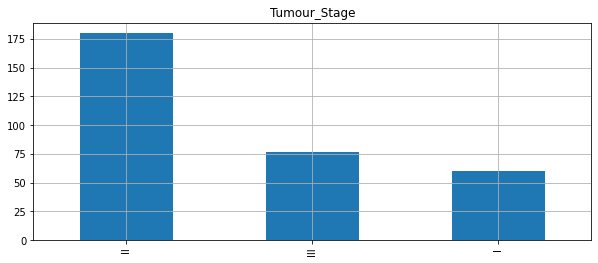

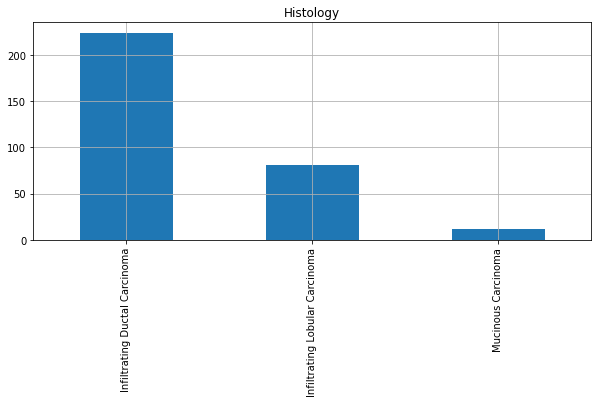

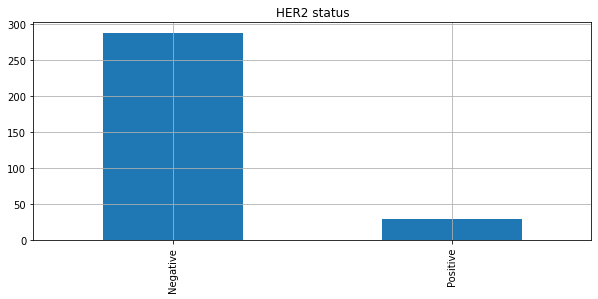

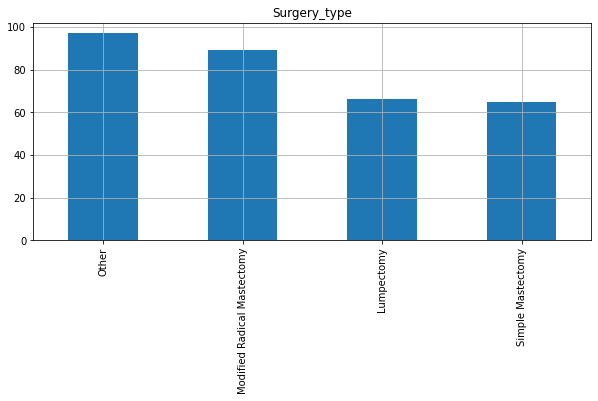

In [5]:
#Catogorical features histogram 
features_cat = ['Tumour_Stage', 'Histology','HER2 status', 'Surgery_type']

for f in features_cat:
    plt.figure(figsize=(10,4))
    dataset[f].value_counts().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

**Drop irrelevant features and categorize some features**

In [6]:
dataset = dataset.drop(['ER status','PR status','Date_of_Surgery','Date_of_Last_Visit'],axis=1)
#dead = 0; alive = 1
dataset = dataset.replace(['Alive','Dead'],[1,0])
#Categorize data 
labelencoder_Y = LabelEncoder()
dataset['Gender'] = labelencoder_Y.fit_transform(dataset['Gender'])
dataset['Tumour_Stage'] = labelencoder_Y.fit_transform(dataset['Tumour_Stage'])
dataset['Histology'] = labelencoder_Y.fit_transform(dataset['Histology'])
dataset['HER2 status'] = labelencoder_Y.fit_transform(dataset['HER2 status'])
dataset['Surgery_type'] = labelencoder_Y.fit_transform(dataset['Surgery_type'])
X = dataset.drop(['Patient_ID','Patient_Status'],axis=1)
Y = dataset['Patient_Status']

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      317 non-null    object 
 1   Age             317 non-null    float64
 2   Gender          317 non-null    int32  
 3   Protein1        317 non-null    float64
 4   Protein2        317 non-null    float64
 5   Protein3        317 non-null    float64
 6   Protein4        317 non-null    float64
 7   Tumour_Stage    317 non-null    int32  
 8   Histology       317 non-null    int32  
 9   HER2 status     317 non-null    int32  
 10  Surgery_type    317 non-null    int32  
 11  Patient_Status  317 non-null    int64  
dtypes: float64(5), int32(5), int64(1), object(1)
memory usage: 26.0+ KB


In [7]:
#Check there is null or na
dataset.isnull().sum()
dataset.isna().sum()

Patient_ID        0
Age               0
Gender            0
Protein1          0
Protein2          0
Protein3          0
Protein4          0
Tumour_Stage      0
Histology         0
HER2 status       0
Surgery_type      0
Patient_Status    0
dtype: int64

## EDA

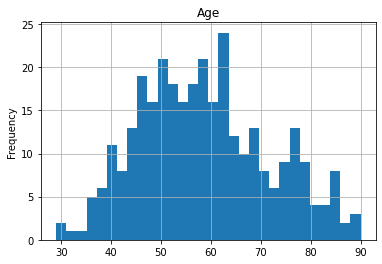

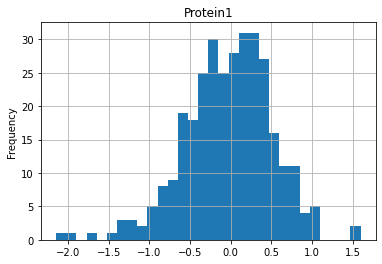

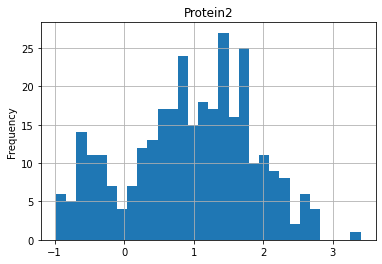

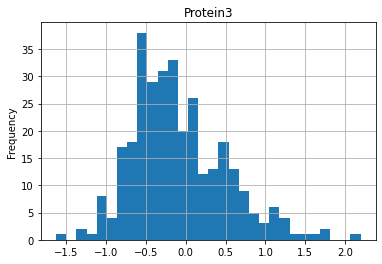

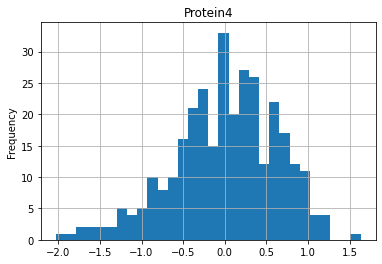

In [8]:
#Plot distribution of numerical features
features_num = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']
dataset[features_num].describe()
for f in features_num:
    dataset[f].plot(kind='hist', bins=30)
    plt.title(f)
    plt.grid()
    plt.show()

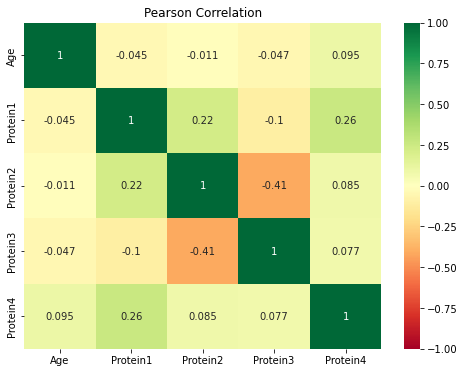

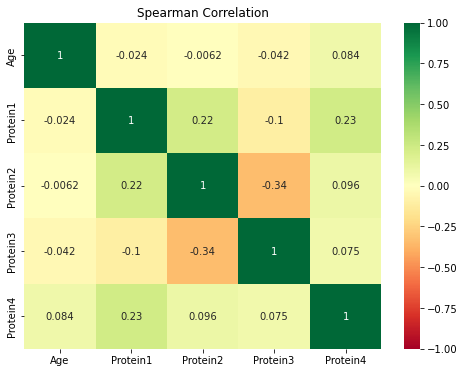

In [9]:
#Do a correlation for numerical features
corr_pearson = dataset[features_num].corr(method='pearson')
corr_spearman = dataset[features_num].corr(method='spearman')

fig = plt.figure(figsize = (8,6))
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show()

fig = plt.figure(figsize = (8,6))
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

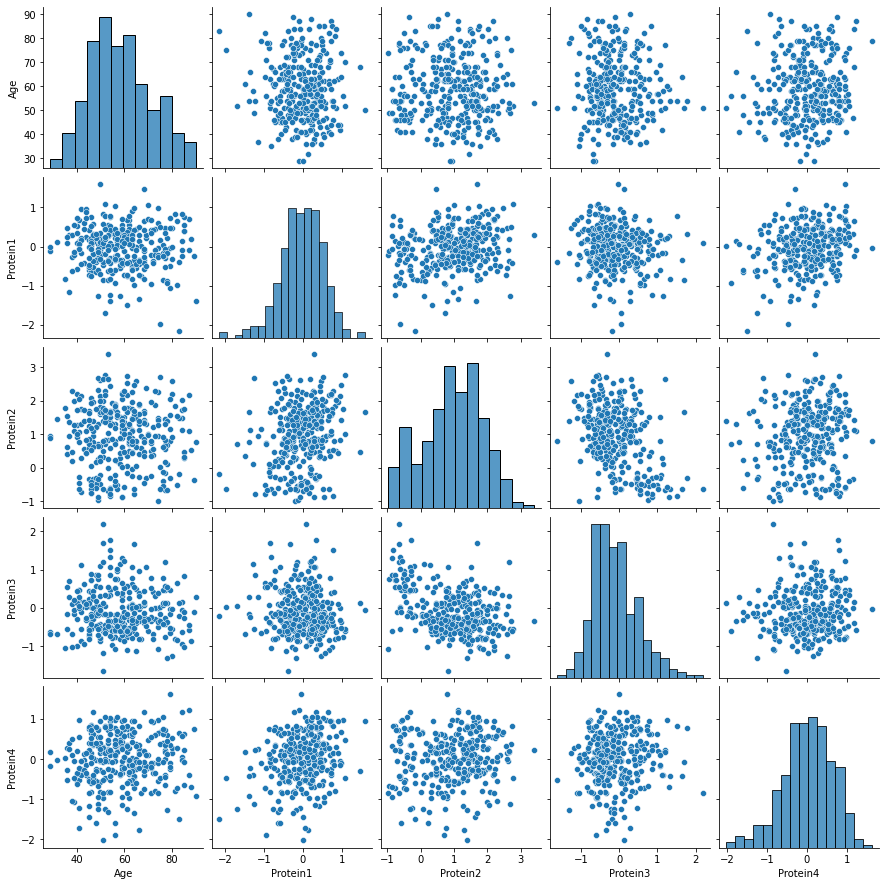

In [10]:
#see pairplot, EDA
sns.pairplot(dataset[features_num])
plt.show()

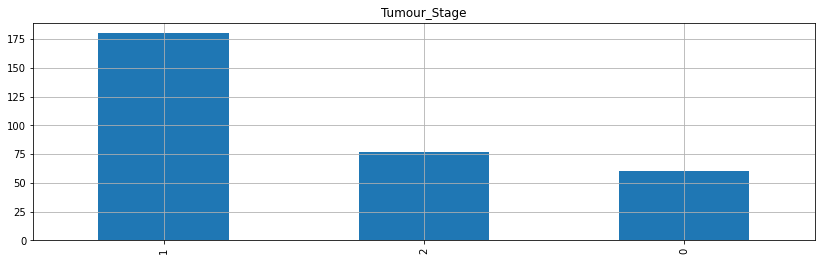

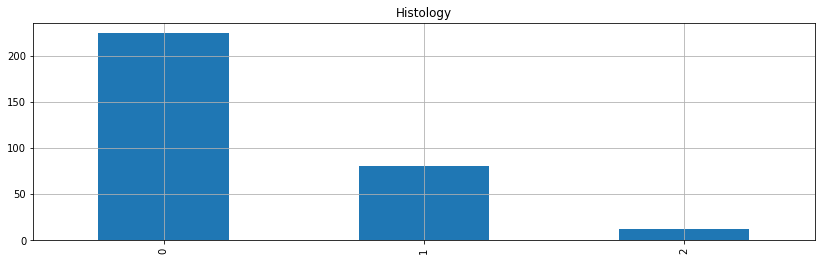

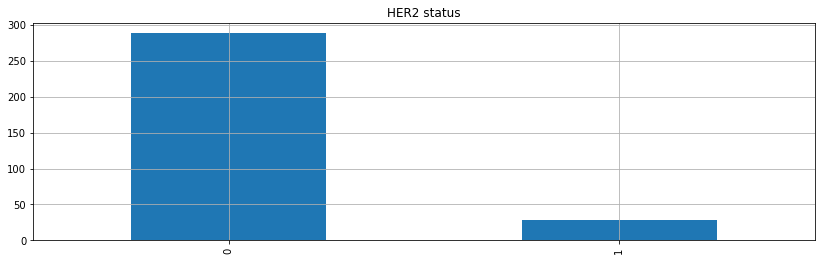

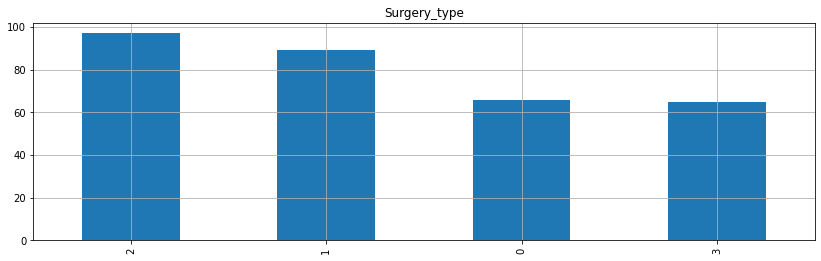

In [11]:
#Histogram of categorical features
features_cat = ['Tumour_Stage', 'Histology','HER2 status', 'Surgery_type']

for f in features_cat:
    plt.figure(figsize=(14,4))
    dataset[f].value_counts().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

## Models Selection with Naive Models

In [12]:
#Split data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [13]:
#Scalering data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
res = []
method = []

In [14]:
#Using Logistic Regression Algorithm to the Training Set

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

print("Test set AUC score Logistic Regression: %f" % roc_auc_score(Y_test,Y_pred))
cmLR = confusion_matrix(Y_test, Y_pred)
AccLR = (cmLR[0][0]+cmLR[1][1])/sum(sum(cmLR))
method.append('Logistic Regression')
res.append(AccLR)
print("AccLR: %f" %AccLR)


Test set AUC score Logistic Regression: 0.500000
AccLR: 0.796875


In [15]:
#Run Logistic Regression on full feature set as Expanded Model, WITH regularization

#Will use original Train/Test split

logmodelfull_l1 = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.50, max_iter=10000)
logmodelfull_l1.fit(X_train,Y_train)

# AUC value
logmod_full_l1_pred = logmodelfull_l1.predict_proba(X_test)
print("Test set AUC score of expanded model of Logistic Regression w regularization: %f" %roc_auc_score(Y_test, logmod_full_l1_pred[:,1]))
#Accuracy data
cmEM = confusion_matrix(Y_test, Y_pred)
AccEM = (cmLR[0][0]+cmLR[1][1])/sum(sum(cmLR))
method.append('Logistic Regression')
res.append(AccEM)
print("AccEM: %f" %AccEM)

Test set AUC score of expanded model of Logistic Regression w regularization: 0.524887
AccEM: 0.796875


In [16]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
#AUC value
print("Test set AUC score KNeighborsClassifier: %f" % roc_auc_score(Y_test,Y_pred))
#Accuracy value 
cmKN = confusion_matrix(Y_test, Y_pred)
AccKN = (cmKN[0][0]+cmKN[1][1])/sum(sum(cmKN))
method.append('KNeighborsClassifier')
res.append(AccKN)
print("AccKN : %f" %AccKN)

Test set AUC score KNeighborsClassifier: 0.499246
AccKN : 0.750000


In [17]:
#Using SVC method of svm class to use Support Vector Machine Algorithm

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
#AUC value 
print("Test set AUC score SVC (Support Vector Machine Algorithm) : %f" % roc_auc_score(Y_test,Y_pred))
#Accuracy value 
cmSVCL = confusion_matrix(Y_test, Y_pred)
AccSVCL = (cmSVCL[0][0]+cmSVCL[1][1])/sum(sum(cmSVCL))
method.append('SVC method linear')
res.append(AccSVCL)

print("AccSVCL : %f" %AccSVCL)

Test set AUC score SVC (Support Vector Machine Algorithm) : 0.500000
AccSVCL : 0.796875


In [18]:
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
#AUC value 
print("Test set AUC score SVC (Kernel SVM Algorithm): %f" % roc_auc_score(Y_test,Y_pred))
#ACCURACY VALUE 
cmSVCr = confusion_matrix(Y_test, Y_pred)
AccSVCr = (cmSVCr[0][0]+cmSVCr[1][1])/sum(sum(cmSVCr))
method.append('SVC method rbf')
res.append(AccSVCr)
print("AccSVCr : %f" %AccSVCr)

Test set AUC score SVC (Kernel SVM Algorithm): 0.500000
AccSVCr : 0.796875


In [19]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm

classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
#AUC VALUE 
print("Test set AUC score GaussianNB: %f" % roc_auc_score(Y_test,Y_pred))
#Accuracy 
cmG = confusion_matrix(Y_test, Y_pred)
AccG = (cmG[0][0]+cmG[1][1])/sum(sum(cmG))
method.append('GaussianNB method')
res.append(AccG)
print("AccG : %f" %AccG)

Test set AUC score GaussianNB: 0.500000
AccG : 0.796875


In [20]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
#AUC value 
print("Test set AUC score DecisionTreeClassifier: %f" % roc_auc_score(Y_test,Y_pred))
cmDT = confusion_matrix(Y_test, Y_pred)
AccDT = (cmDT[0][0]+cmDT[1][1])/sum(sum(cmDT))
method.append('DecisionTreeClassifier')
res.append(AccDT)
#ACCURACY 
print("AccDT : %f" %AccDT)

Test set AUC score DecisionTreeClassifier: 0.633484
AccDT : 0.781250


In [21]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
#AUC VALUE 
print("Test set AUC score RandomForestClassifier: %f" % roc_auc_score(Y_test,Y_pred))
#ACCURACY 
cmRF = confusion_matrix(Y_test, Y_pred)
AccRF = (cmRF[0][0]+cmRF[1][1])/sum(sum(cmRF))
method.append('RandomForestClassifier')
res.append(AccRF)
print("AccRF : %f" %AccRF)


Test set AUC score RandomForestClassifier: 0.470588
AccRF : 0.750000


## The Feature Importance

In [22]:
## The feature importance corresponds to each feature
print("RandomForest max_features: ", classifier.max_features)
classifier.feature_importances_
X_col_names = X.columns
feat_imp_df = pd.DataFrame({'feature': X_col_names
                              ,'importance': classifier.feature_importances_})\
                            .sort_values('importance', ascending=False)
feat_imp_df

RandomForest max_features:  auto


,feature,importance
3,Protein2,0.181473
5,Protein4,0.177755
0,Age,0.175736
4,Protein3,0.168822
2,Protein1,0.125907
9,Surgery_type,0.069153
6,Tumour_Stage,0.054318
7,Histology,0.033949
8,HER2 status,0.009962
1,Gender,0.002926


[Text(0.5, 1.0, 'Feature Importance')]

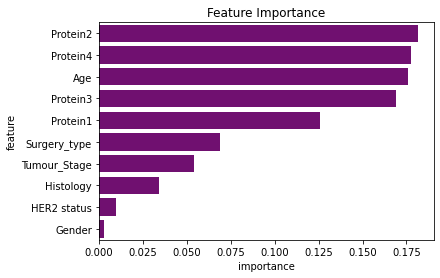

In [23]:
#plt.figure(figsize(15,20))
sns.barplot(x=feat_imp_df['importance']
            , y=feat_imp_df['feature']
            , color='purple').set(title="Feature Importance")

## Check outliers because the models are sensitive to them

import the dataset again because this time we want to drop outliers

In [24]:

dataset = pd.read_csv('BRCA.csv')
dataset = dataset.dropna()
dataset = dataset.drop(['ER status','PR status','Date_of_Surgery','Date_of_Last_Visit'],axis=1)
#dead = 0; alive = 1
dataset = dataset.replace(['Alive','Dead'],[1,0])
#Categorize data 
labelencoder_Y = LabelEncoder()
dataset['Gender'] = labelencoder_Y.fit_transform(dataset['Gender'])
dataset['Tumour_Stage'] = labelencoder_Y.fit_transform(dataset['Tumour_Stage'])
dataset['Histology'] = labelencoder_Y.fit_transform(dataset['Histology'])
dataset['HER2 status'] = labelencoder_Y.fit_transform(dataset['HER2 status'])
dataset['Surgery_type'] = labelencoder_Y.fit_transform(dataset['Surgery_type'])
X = dataset.drop(['Patient_ID','Patient_Status'],axis=1)
Y = dataset['Patient_Status']

In [25]:
df = dataset.drop(['Patient_ID','Gender','Tumour_Stage', 'Histology', 'HER2 status', 'Surgery_type','Patient_Status'],axis=1)

In [26]:
selected_columns = df.columns

**Identifying outliers using z-score**

In [27]:
for feature in selected_columns:
    z = np.abs(stats.zscore(dataset[feature]))
    threshold = 3
    print(feature)
    print(np.where(z > 3))
    outlier = np.where(z>3)
    print(dataset[feature].iloc[outlier])

Age
(array([], dtype=int64),)
Series([], Name: Age, dtype: float64)
Protein1
(array([ 12,  83, 121], dtype=int64),)
13    -1.6828
85    -2.1446
125   -1.9711
Name: Protein1, dtype: float64
Protein2
(array([], dtype=int64),)
Series([], Name: Protein2, dtype: float64)
Protein3
(array([122, 132, 244], dtype=int64),)
126    1.7019
136    1.7691
255    2.1934
Name: Protein3, dtype: float64
Protein4
(array([ 82, 127], dtype=int64),)
84    -2.0255
131   -1.8993
Name: Protein4, dtype: float64


### Remove any outlier that are found

In [28]:
for feature in selected_columns:
    z = np.abs(stats.zscore(dataset[feature]))
    threshold = 3
    outlier = np.where(z>threshold)

    dataset[feature].iloc[outlier] =  np.nan
    


C:\Users\18482\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [29]:
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 0 to 333
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      309 non-null    object 
 1   Age             309 non-null    float64
 2   Gender          309 non-null    int32  
 3   Protein1        309 non-null    float64
 4   Protein2        309 non-null    float64
 5   Protein3        309 non-null    float64
 6   Protein4        309 non-null    float64
 7   Tumour_Stage    309 non-null    int32  
 8   Histology       309 non-null    int32  
 9   HER2 status     309 non-null    int32  
 10  Surgery_type    309 non-null    int32  
 11  Patient_Status  309 non-null    int64  
dtypes: float64(5), int32(5), int64(1), object(1)
memory usage: 25.3+ KB


In [30]:
X = dataset.drop(['Patient_ID','Patient_Status'],axis=1)
Y = dataset['Patient_Status']

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
res = []
method = []

## Choosing among the best performing Naive models (SVC, GaussianNB, Logistic)

### Grid search on SVC

In [33]:
parameters = [ {'C':[0.50, 1, 10, 100, 1000], 
                'kernel':['linear']},
               {'C':[0.50, 1, 10, 100, 1000], 
                'kernel':['rbf'], 
                'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[0.50, 1, 10, 100, 1000], 
                'kernel':['poly'], 'degree': [2,3,4] ,
                'gamma':[0.01,0.02,0.03,0.04,0.05]},
               {'C':[0.50, 1, 10, 100, 1000], 
                'kernel':['sigmoid'],
                'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
              ]
svc_grid_search = GridSearchCV(estimator = SVC(),  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           verbose=0)

svc_grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.5, 1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [0.5, 1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']},
                         {'C': [0.5, 1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['sigmoid']}],
             scoring='accuracy')

In [34]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score on the train set: {:.4f}\n\n'.format(svc_grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (svc_grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (svc_grid_search.best_estimator_))

GridSearch CV best score on the train set: 0.8057


Parameters that give the best results : 

 {'C': 0.5, 'gamma': 0.2, 'kernel': 'sigmoid'}


Estimator that was chosen by the search : 

 SVC(C=0.5, gamma=0.2, kernel='sigmoid')


In [35]:
svc_best=SVC(
    C=0.5 , 
    kernel='sigmoid', 
    degree=3, 
    gamma=0.2,
    coef0=0,
    random_state=0
) 

# fit classifier to training set
svc_best.fit(X_train, Y_train)

# make predictions on train & test set
y_pred_train=svc_best.predict(X_train)
y_pred_test=svc_best.predict(X_test)

# compute and print accuracy score
print('Model TEST accuracy score with default hyperparameters: {}'. format(accuracy_score(Y_test, y_pred_test)))

Model TEST accuracy score with default hyperparameters: 0.8064516129032258


**HOWEVER!!**

In [36]:

# For some reason that I do not understand, default setting has a better performance than gird Search model, 
# even though I made sure the default values are included during grid search

svc_best=SVC(C=1 , 
    kernel='rbf', 
    degree=3, 
    gamma=0.2,
    coef0=0,
    random_state=0) 

# fit classifier to training set
svc_best.fit(X_train, Y_train)

# make predictions on train & test set
y_pred_train=svc_best.predict(X_train)
y_pred_test=svc_best.predict(X_test)

# compute and print accuracy score
print('Model TEST accuracy score with default hyperparameters: {}'. format(accuracy_score(Y_test, y_pred_test)))


Model TEST accuracy score with default hyperparameters: 0.8387096774193549


### Grid Search on Logistic Regression

LR roc_auc score

In [37]:
logmodelfull_l1cv = LogisticRegressionCV(cv=5, penalty='elasticnet', l1_ratios=[0.10, 0.25, 0.5, 0.75, 0.90], solver='saga',  max_iter=10000)
logmodelfull_l1cv.fit(X_train,Y_train)

logmod_full_l1cv_pred = logmodelfull_l1cv.predict_proba(X_test)

print(roc_auc_score(Y_test, logmod_full_l1cv_pred[:,1]))


0.5


In [38]:
lr_clf = LogisticRegression(penalty='l2',
                            C = 1.0,
                            max_iter=100,
                            solver='lbfgs',
                            random_state = 0)

lr_clf.fit(X_train, Y_train)
lr_clf.score(X_test,Y_test)

0.8387096774193549

In [39]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm

classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cmG = confusion_matrix(Y_test, Y_pred)
AccG = (cmG[0][0]+cmG[1][1])/sum(sum(cmG))
method.append('GaussianNB method')
res.append(AccG)
print(AccG)

0.8225806451612904


Note that GaussianNB performs better after removing outlier, but it is still slightly worse than SVC and LR. Also I did not do any parameter tuning for GaussianNB because there isn't any to tune! 

## Logistic Regression and SVC are the best models we have

Both work just fine with the default parameters

### AUC_ROC curve plotting


#### Logistic Regression

In [40]:
log_regression = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, Y_train)

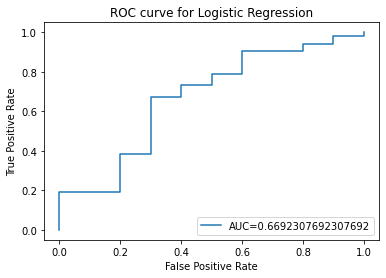

In [41]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC curve for Logistic Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#### SVC

In [42]:
svc_best=SVC(C=1 , kernel='rbf', degree=3, gamma=0.2, coef0=0, probability = True, random_state=0)
svc_best.fit(X_train, Y_train)

SVC(C=1, coef0=0, gamma=0.2, probability=True, random_state=0)

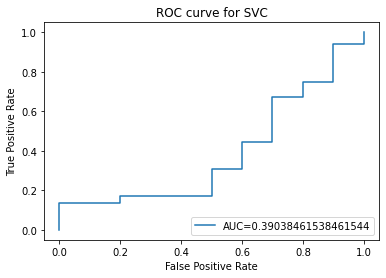

In [43]:
y_pred_proba = svc_best.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC curve for SVC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Conclusion

Both SVC and Logistic Regression model have the same TEST accuracy score with default hyperparameters: 0.8387096774193549. They both have a good performance on making the correct preditions on our test dataset.

However, SVC has a roc_auc score of 0.39 while Logistic Regression has a roc_auc score of 0.66. We conclude LR is a better model. LR model predicts all accurately classified classes with approximately 66% probability, while SVC model has accurately classifying classes with a probability of only about 39%. It’s clear that they both have the same accuracy but LR model is more convinced in its prediction.